# Del 1 - Teoretiska frågor

#### 1.  Många barn tror att de blev till genom att en stork kom och lämnade dem till deras föräldrar. <br><br>För att undersöka det kan vi kolla på data och det finns en graf enligt figuren nedan. <br><br> Det verkar alltså finnas ett samband mellan antalet storkar och barnafödsel!? Stämmer detta påståendet? Använd begreppen ”korrelation” och ”kausalitet” i ditt svar. 

Svar: <br>Det finns en korrelation mellan ny födda barn och antalet storkar som ökar men detta är inte pågrund av att storkarna levererar barn till deras föräldrar så det påståendet stämmer ej. Det är alltså ingen kausalitet mellan storkar och barnfödsel. 

#### 2. Din kollega som inte studerat statistik frågar dig: vad är korrelation? Förklara det för din kollega med hjälp av bilden nedan. 

Svar: <br>Korrelation är när något har ett samband. Den övre bilden visar en stark positiv korrelation på 1 och när den gå ner så blir korrelationen svagare, när det kommer till 0 har det ingen korrelation alls till att det har en stark negativ korrelation. På den Mellersta visar ett liknande spann men där har vi ett starkare linjärt samband. Den nedersta visualiserar en korrelation som inte har något linjärt samband, det betyder inte att det inte finns något korrelation alls men på bilden ser vi att de har någon form av mönster

#### 3. Kim påstår att ”medelvärdet” är ett bättre mått än ”medianvärdet”. Håller du med Kim?

Jag håller inte med Kim i att medelvärdet är ett bättre mått än medianvärdet eftersom att det kan finnas någon siffra som sticker iväg vilket kan påverka medelvärdet väldigt mycket.

#### 4. Vad används cirkeldiagram för? Ge ett exempel på vad ett företag som Spotify (eller något annat företag som du själv väljer) hade kunnat använda cirkeldiagram för. 

Ett cirkeldiagram används för att visa andelar av en helhet. Det hjälper till att organisera och visa data som en procentandel. Om man tar Spotify som exempel så använder de cirkeldiagram för att visa deras användare vilken typ av musik och vilka artister de har lyssnat på varje månad.

#### 5. Vad används linjediagram för? Ge ett exempel på vad ett företag som Spotify (eller något annat företag som du själv väljer) hade kunnat använda linjediagram för.

Ett linjediagram används för att kunna visualisera hur något förändras över tid. Om vi tar Spotify som exempel så kan de använda linjediagram för att se hur antalet användare ökar över tid.

#### 6. Vad används lådagram för? 

Ett lådagram används för används för att sortera observerade värden i en rektangel där man har medianen som ett streck i mitten. Man har en nedre kvartil som ligger på 25% och en övre kvartil som är på 75%. Detta kan man använda för att se fördelningen på värdena. Ett lådagram används mycket inom statistik när man vill kunna kartlägga hur stor spridning man har på sina värden.  

#### 7. Antag att vikten för nyfödda barn är normalfördelad. I sverige är medelvikten för nyfödda barn 3.5 kg och standardavvikelsen 0.5 kg. Vad betyder detta rent konkret? Vad är exempelvis sannolikheten att ett barn väger över 4.5 kg eller mindre än 3 kg?


Om vi kollar på 1000 nyfödda barn, hur många barn förväntar vi oss väger över 4.5 kg? 

Svar: <br> Att det är normalfördelat betyder att det följer ett mönster. Att standartavvikelsen är 0.5 kg betyder att 68,27% av alla barn väger mellan 3 och 4 kg. Sannolikheten att ett barn vägen över 4,5 kg är 2.27% medan ett barn som vägen under 3 kg är 15,86%.

När vi kollar på 1000 nyfödda barn och ska se hur många som väger över 4,5 kg så blir det som tidigare 2,27% alltså 23 barn som kommer väga över 4.5 kg

# Del 2 - Statistik, dataabakys i Python

# Bakgrund

I denna notebooken går jag igenom och kollar närmre på Nytto Maximerarnas "hr-employee" dataset. Jag kommer att gå in på de olika avdelningarna och deras nöjdhetsnivå, jag ska ta reda på vilken avdelning som har lägst nöjdhetsnivå och se vad det kan bero på.

### Fokus område 
<br>- Nöjdhetsnivå per avdelning <br>- Årets nöjdhetsnivå mot förra årets nöjdhetsnivå <br>- Nöjdhetsnivå mot genomsnittliga timmar per månad <br>- Genomsnittliga nöjdhetsnivån på accounting och marketing <br>- Nöjdhetsnivå mot antalet år jobbade på företaget på accounting och marketing <br>- Antalet anställda mot deras nöjdhetsnivå på accounting och marketing <br>- Nöjdhetsnivån av de som jobbar kvar och de som har lämnat företaget från accounting och marketing

In [56]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
df = pd.read_excel(r"C:\Users\maxro\Documents\Skola\DM24H\Statistik och dataanalys\Kunskapskontroll_1\HR_Employee_Data.xlsx")

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   emp_ID                  14999 non-null  object 
 1   satisfaction_level      14999 non-null  float64
 2   last_evaluation         14999 non-null  float64
 3   number_project          14999 non-null  int64  
 4   average_monthly_hours   14999 non-null  int64  
 5   time_spend_company      14999 non-null  int64  
 6   work_accident           14999 non-null  int64  
 7   left_company            14999 non-null  int64  
 8   promotion_last_5_years  14999 non-null  int64  
 9   department              14999 non-null  object 
 10  salary                  14999 non-null  object 
dtypes: float64(2), int64(6), object(3)
memory usage: 1.3+ MB


In [ ]:
if "average_montly_hours" in df.columns:
    df.rename(columns={"average_montly_hours": "average_monthly_hours"}, inplace=True)
if "Department" in df.columns:
    df.rename(columns={"Department": "department"}, inplace=True)
if "Work_accident" in df.columns:
    df.rename(columns={"Work_accident": "work_accident"}, inplace=True)
if "Emp_Id" in df.columns:
    df.rename(columns={"Emp_Id": "emp_ID"}, inplace=True)
if "promotion_last_5years" in df.columns:
    df.rename(columns={"promotion_last_5years": "promotion_last_5_years"}, inplace=True)
if "left" in df.columns:
    df.rename(columns={"left": "left_company"}, inplace=True)

In [60]:
df.head()

,emp_ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left_company,promotion_last_5_years,department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [61]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left_company,promotion_last_5_years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [62]:
df.select_dtypes(include=["int", "float"]).corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left_company,promotion_last_5_years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left_company,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5_years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

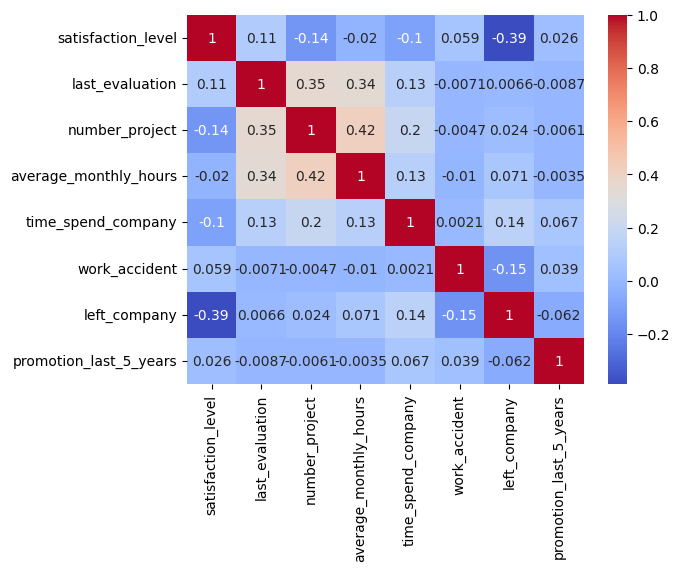

In [63]:
sns.heatmap(df.select_dtypes(include=["int", "float"]).corr(), cmap="coolwarm", annot=True)

In [64]:
grouped_department_df = df.groupby("department")[["satisfaction_level"]].mean().round(2).reset_index()

Text(0, 0.5, 'Avarage Satisfaction Level')

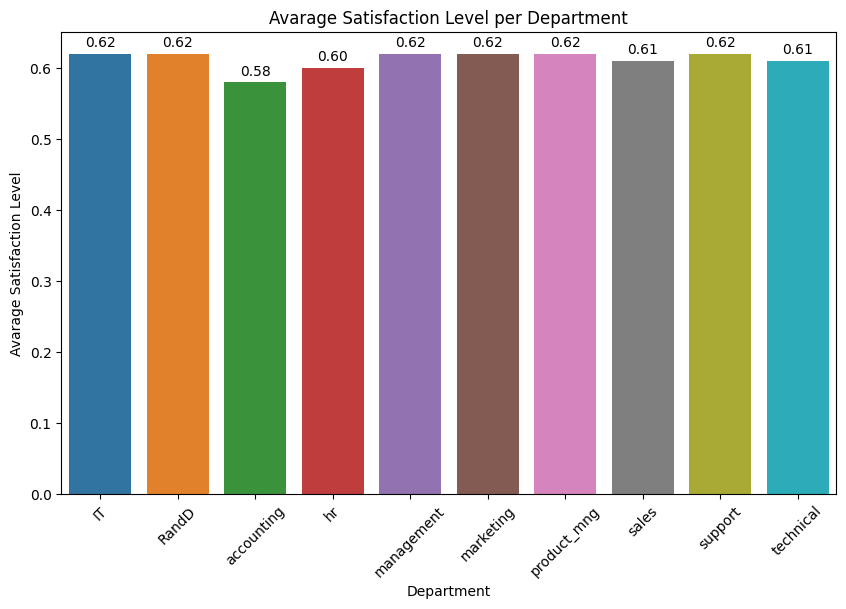

In [65]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="department", y="satisfaction_level", hue="department", data=grouped_department_df)

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type="edge", padding=3)

plt.title("Avarage Satisfaction Level per Department")
plt.xlabel("Department")
plt.xticks(rotation=45)
plt.ylabel("Avarage Satisfaction Level")

In [66]:
last_satisfaction_department_df = df.groupby("department")[["satisfaction_level", "last_evaluation"]].mean().round(2).reset_index()

C:\Users\maxro\AppData\Local\Temp\ipykernel_18292\2872289856.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
C:\Users\maxro\AppData\Local\Temp\ipykernel_18292\2872289856.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


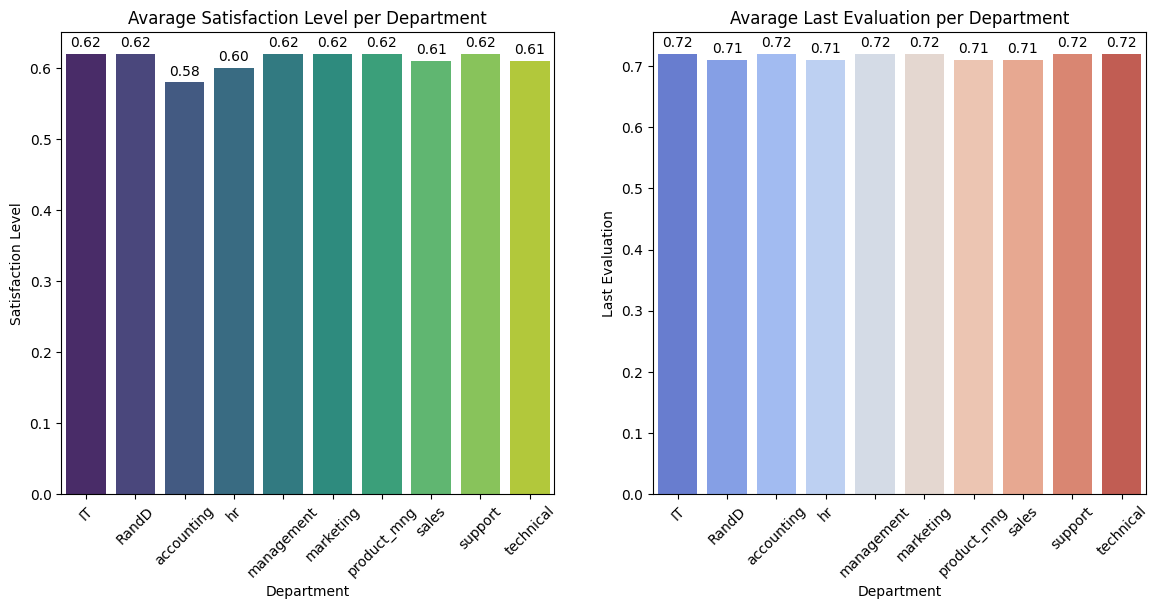

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

ax = sns.barplot(ax=axes[0], data=last_satisfaction_department_df, x="department", y="satisfaction_level", palette="viridis", hue='department')
axes[0].set_title("Avarage Satisfaction Level per Department")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_xlabel("Department")
axes[0].set_ylabel("Satisfaction Level")

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type="edge", padding=3)

ax = sns.barplot(ax=axes[1], data=last_satisfaction_department_df, x="department", y="last_evaluation", palette="coolwarm", hue="department")
axes[1].set_title("Avarage Last Evaluation per Department")
axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[1].set_xlabel("Department")
axes[1].set_ylabel("Last Evaluation")

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type="edge", padding=3)

In [68]:
grouped_df = df.groupby("department")[["satisfaction_level", "average_monthly_hours"]].mean().round(2).reset_index()

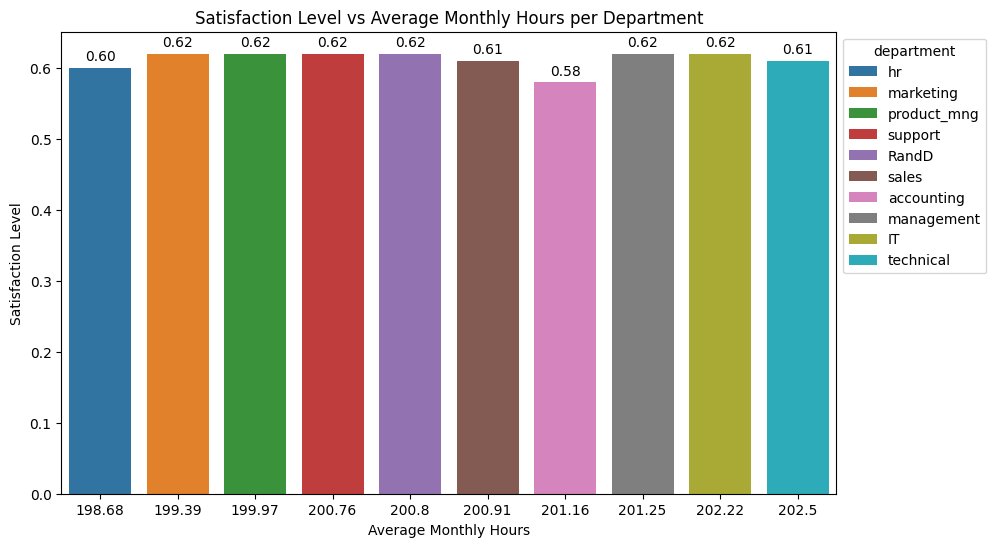

In [69]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="average_monthly_hours", y="satisfaction_level", hue="department", data=grouped_df)

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type="edge", padding=3)

plt.xlabel("Average Monthly Hours")
plt.ylabel("Satisfaction Level")
plt.title("Satisfaction Level vs Average Monthly Hours per Department")
plt.legend(title="department", bbox_to_anchor=(1, 1))

In [70]:
df_departments = df[
    (df["department"].isin(["accounting", "marketing"]))
]

In [71]:
df_department = df_departments.groupby(["department", "salary"]).agg(
    avg_satisfaction=("satisfaction_level", "mean"),
    count=("salary", "count")
).reset_index()

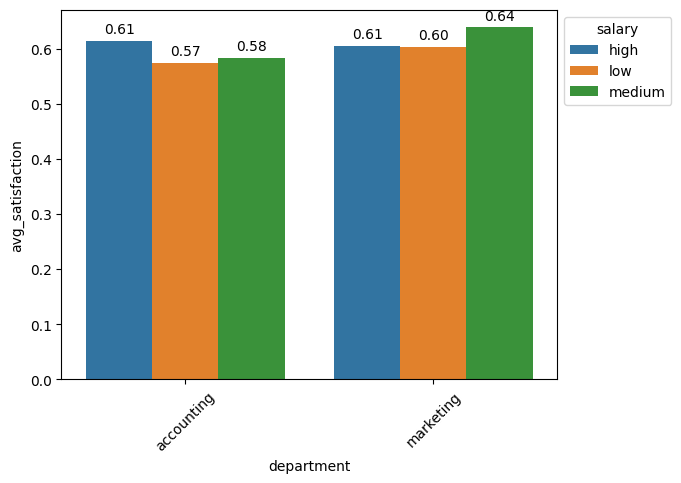

In [72]:
ax = sns.barplot(data=df_department, x="department", y="avg_satisfaction", hue="salary")
plt.xticks(rotation=45)
plt.legend(title="salary", bbox_to_anchor=(1, 1))

for bar in ax.containers:
    ax.bar_label(bar, fmt='%.2f', label_type="edge", padding=3)

In [73]:
accounting = df[df["department"].isin(["accounting"])]
marketing = df[df["department"].isin(["marketing"])]

Text(0, 0.5, 'Satisfaction Level')

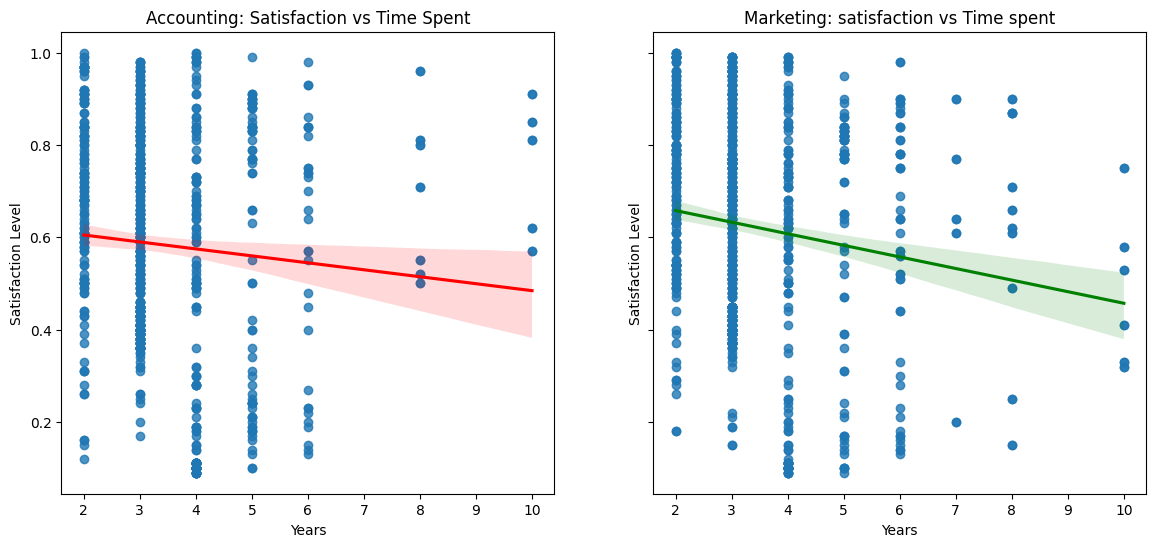

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
 
sns.regplot(data=accounting, x="time_spend_company", y="satisfaction_level",scatter=True, line_kws={"color": "red"}, ax=axes[0])
axes[0].set_title("Accounting: Satisfaction vs Time Spent")
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Satisfaction Level")
 
 
sns.regplot(data=marketing, x="time_spend_company", y="satisfaction_level",scatter=True, line_kws={"color": "green"}, ax=axes[1])
axes[1].set_title("Marketing: satisfaction vs Time spent")
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Satisfaction Level")

Text(0.5, 1.0, 'Distribution of employees satisfaction level')

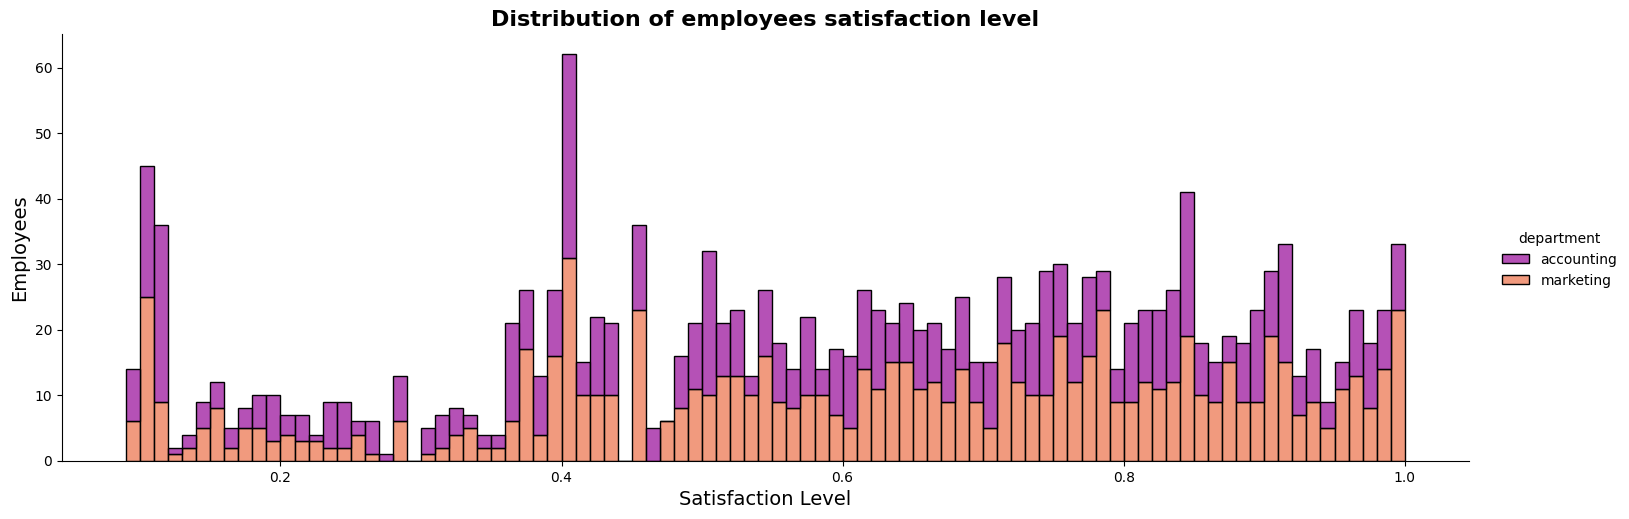

In [75]:
sns.displot(df_departments, x="satisfaction_level", hue="department", binwidth=.01, aspect=3, multiple="stack", palette="plasma")
 
plt.xlabel("Satisfaction Level", fontsize=14)
plt.ylabel("Employees", fontsize=14)
plt.title("Distribution of employees satisfaction level", fontsize=16, fontweight="bold")

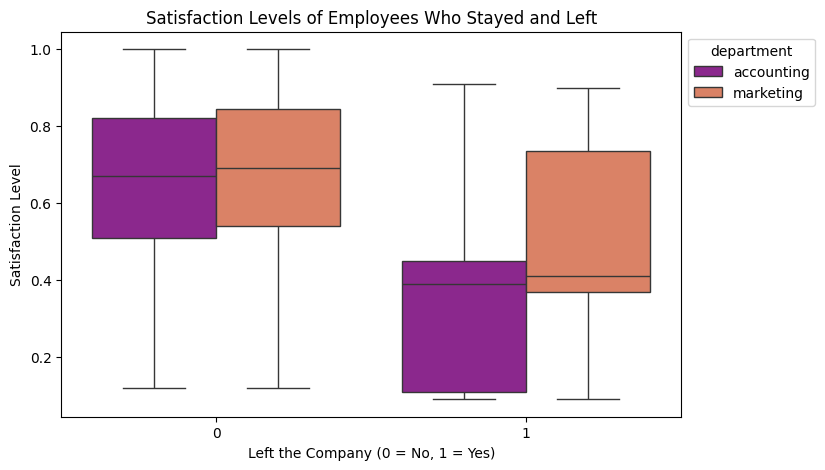

In [76]:
plt.figure(figsize=(8,5))

sns.boxplot(x="left_company", y="satisfaction_level", data=df_departments, hue="department", palette="plasma", legend=True)

plt.title("Satisfaction Levels of Employees Who Stayed and Left")
plt.xlabel("Left the Company (0 = No, 1 = Yes)")
plt.ylabel("Satisfaction Level")
plt.legend(title="department", bbox_to_anchor=(1, 1))

# Exlusive Summary

Jag har kollat på nöjdhetsnivåerna på de olika avdelningarna och sedan fördjupat oss på accounting och marketing. Jag valde göra en fördjupad analys av den avdelning som hade lägst nöjdhetsnivå för att se varför just den avdelningen ligger så pass mycket lägre än de andra. Vi ser att accounting ligger lägst i nöjdhetsnivå men att i förra årets undersökning var det en av de mest nöjda avdelningar. Vad kan detta då bero på? Vi ser att de som har lämnat accounting avdelningen har gett ett betydligt läget svar på hur nöjda de är än om man kollar på marketing. Jag anser att vid vidare analys att man tar bort datan från de som har lämnat företaget eftersom deras nöjdhetsnivå kommer alltid vara betydligt mycket lägre än de som jobbar kvar. Vill man se hur nöjda de som faktiskt jobbar på förertaget just nu är så kan det vara ett bra alternativ.

# Del 3 Självutvärdering

#### 1. Vad har varit roligast i kunskapskontrollen?


Det som jag tycker har varit roligast med denna kunskapskontrollen är att man kunde välja själv vilken inriktning man ville gå och hur man skulle bygga upp de olika diagramen. Det var kul att försöka kolla på de saker som stack ut och varför just dem stack ut.

#### 2. Vilket betyg anser du att du ska ha och varför? 

Jag anser att VG är ett rimligt betyg på denna kunskapskontrollen eftersom att det är en tydlig och strukturerad analys, den är lätt att följa koden och man ser hur allt är uppbyggt. Det har varit ett självständigt arbete där jag har suttit många timmar för att få till en så bra och stabil analys som möjligt. Det finns alltid mer saker man kan göra men med den tiden vi hade så anser jag att det är en väldigt bra analys och den uppfyller kraven i kursplanen för ett VG.

#### 3. Vad har varit mest utmanande i arbetet och hur har du hanterat det?

Det som jag anser har varit mest utmanade i denna kunskapskontrollen är hur och var man skulle börja. Det tog rätt många timmar att komma igång och hitta vad jag ville analysera, det var även utmanande att veta vilken typ av diagram man skulle använda sig av och hur man skulle filtrera de olika kolumnerna för att få ut det jag ville få ut.